<a href="https://colab.research.google.com/github/jmaritar/neural-network/blob/master/src/01_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IntSlider(value=50, description='Masa (gr)')

IntSlider(value=25, description='Salsa (gr)')

IntSlider(value=75, description='Queso (gr)')

IntSlider(value=30, description='Peperoni (gr)')

IntSlider(value=0, description='Salami (gr)')

IntSlider(value=0, description='Jamon (gr)')

Button(description='Clasificar Pizza', style=ButtonStyle())

El tipo de pizza es: Pizza Especial


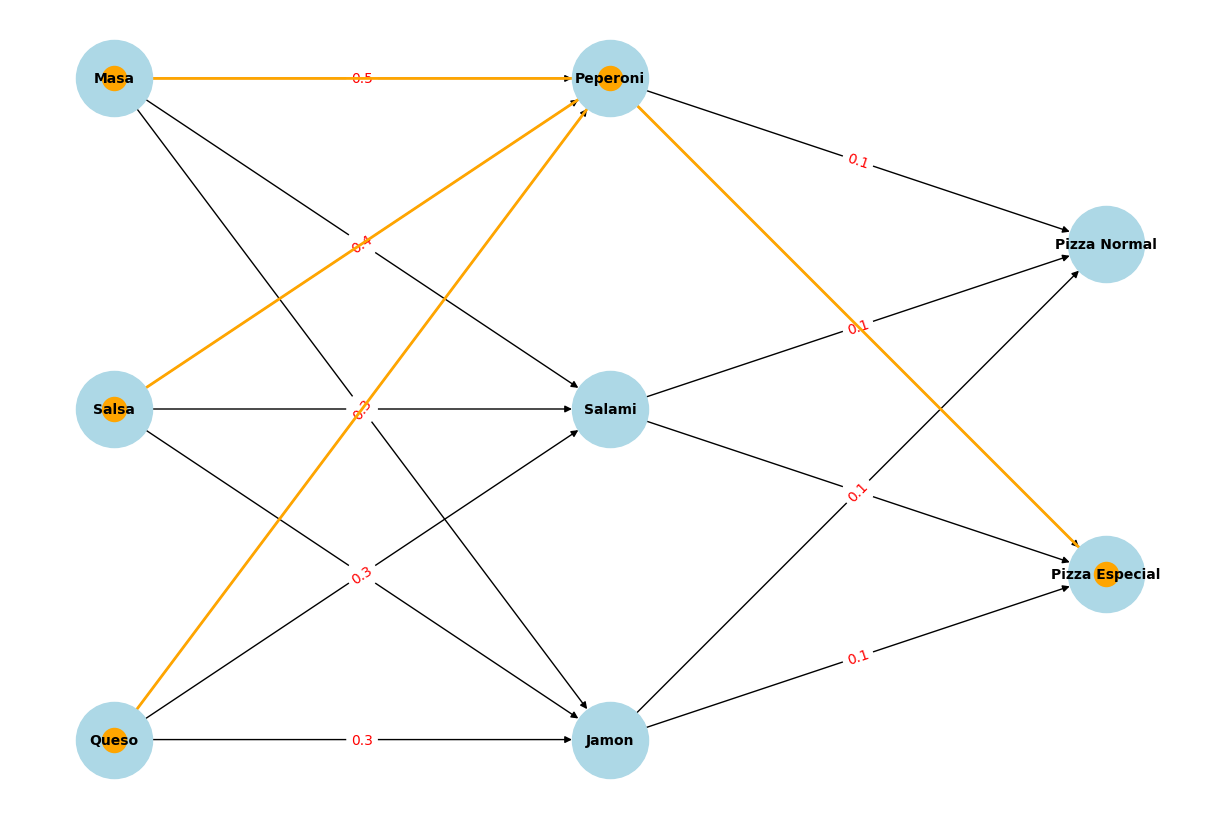

El tipo de pizza es: Pizza Especial


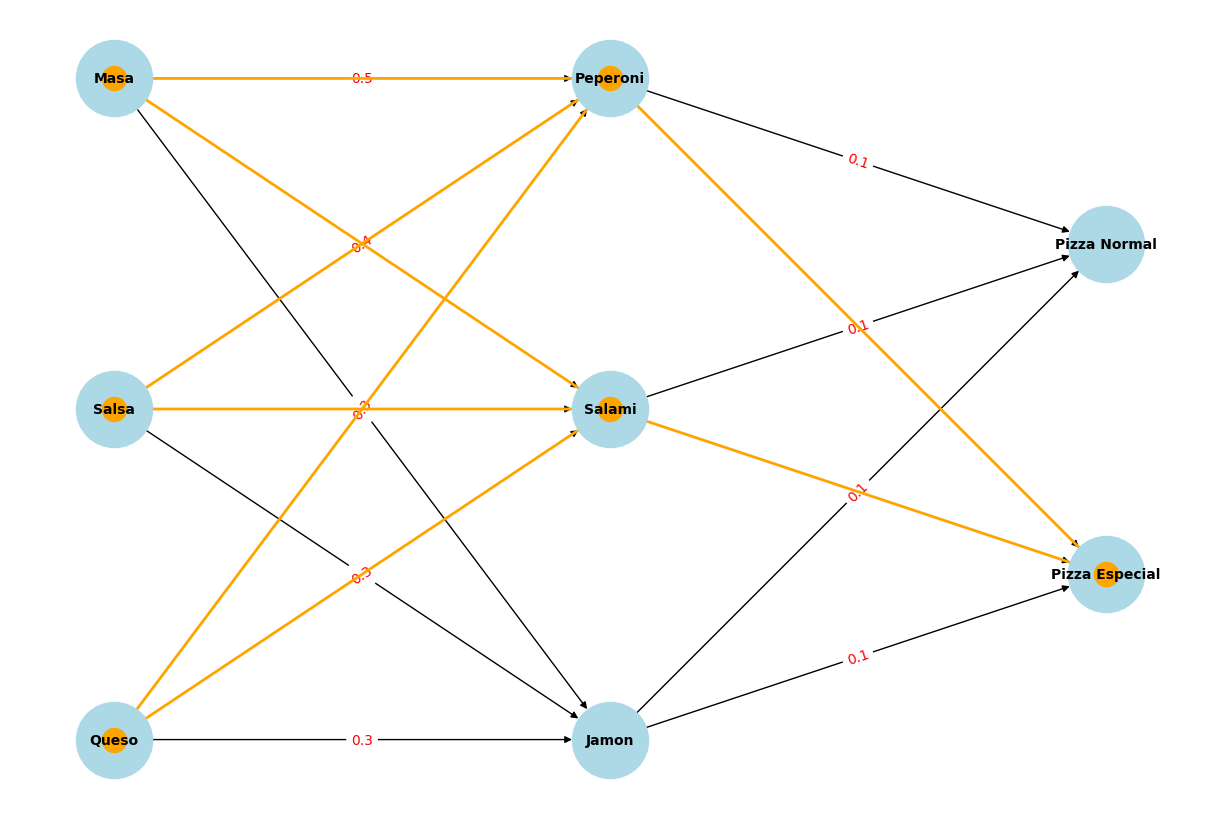

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display
import ipywidgets as widgets

# Definición de los ingredientes básicos y pesos
pesos_entrada = [0.5, 0.4, 0.3]
pesos_ocultos = [0.1, 0.1, 0.1]

# Funciones de cálculo
def calcular_resultado(masa, salsa, queso, ingredientes_especiales):
    x = np.array([masa, salsa, queso])
    y = np.dot(np.array(list(ingredientes_especiales.values())), pesos_ocultos)
    valor_entrada_total = np.sum(np.dot(pesos_entrada, x))
    valor_especial = np.sum(y) * 30
    resultado = valor_entrada_total + valor_especial
    return "Pizza Normal" if resultado == 60.5 else "Pizza Especial" if resultado > 60.5 else "No es una pizza válida"

def visualizar_red(masa, salsa, queso, ingredientes_especiales):
    G = nx.DiGraph()
    edges = [
        ('Masa', 'Peperoni', pesos_entrada[0]), ('Masa', 'Salami', pesos_entrada[0]), ('Masa', 'Jamon', pesos_entrada[0]),
        ('Salsa', 'Peperoni', pesos_entrada[1]), ('Salsa', 'Salami', pesos_entrada[1]), ('Salsa', 'Jamon', pesos_entrada[1]),
        ('Queso', 'Peperoni', pesos_entrada[2]), ('Queso', 'Salami', pesos_entrada[2]), ('Queso', 'Jamon', pesos_entrada[2]),
        ('Peperoni', 'Pizza Normal', pesos_ocultos[0]), ('Peperoni', 'Pizza Especial', pesos_ocultos[0]),
        ('Salami', 'Pizza Normal', pesos_ocultos[1]), ('Salami', 'Pizza Especial', pesos_ocultos[1]),
        ('Jamon', 'Pizza Normal', pesos_ocultos[2]), ('Jamon', 'Pizza Especial', pesos_ocultos[2])
    ]
    G.add_weighted_edges_from(edges)

    pos = {
        'Masa': (0, 2), 'Salsa': (0, 1), 'Queso': (0, 0),
        'Peperoni': (1, 2), 'Salami': (1, 1), 'Jamon': (1, 0),
        'Pizza Normal': (2, 1.5), 'Pizza Especial': (2, 0.5)
    }

    # Calcular activaciones
    activaciones = ['Masa', 'Salsa', 'Queso']
    if ingredientes_especiales['peperoni'] > 0:
        activaciones.append('Peperoni')
    if ingredientes_especiales['salami'] > 0:
        activaciones.append('Salami')
    if ingredientes_especiales['jamon'] > 0:
        activaciones.append('Jamon')
    if calcular_resultado(masa, salsa, queso, ingredientes_especiales) == "Pizza Normal":
        activaciones.append('Pizza Normal')
    else:
        activaciones.append('Pizza Especial')

    # Dibujar grafo
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
    edge_labels = {(u, v): f'{d["weight"]:.1f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Resaltar activaciones
    nx.draw_networkx_nodes(G, pos, nodelist=activaciones, node_color='orange')
    activated_edges = [(u, v) for u, v, d in G.edges(data=True) if u in activaciones and v in activaciones]
    nx.draw_networkx_edges(G, pos, edgelist=activated_edges, edge_color='orange', width=2)

    plt.show()

# Interfaz de usuario para cambiar los valores
masa_slider = widgets.IntSlider(min=0, max=100, step=1, value=50, description='Masa (gr)')
salsa_slider = widgets.IntSlider(min=0, max=100, step=1, value=25, description='Salsa (gr)')
queso_slider = widgets.IntSlider(min=0, max=100, step=1, value=75, description='Queso (gr)')
peperoni_slider = widgets.IntSlider(min=0, max=100, step=1, value=30, description='Peperoni (gr)')
salami_slider = widgets.IntSlider(min=0, max=100, step=1, value=0, description='Salami (gr)')
jamon_slider = widgets.IntSlider(min=0, max=100, step=1, value=0, description='Jamon (gr)')
button = widgets.Button(description='Clasificar Pizza')

def on_button_clicked(b):
    masa = masa_slider.value
    salsa = salsa_slider.value
    queso = queso_slider.value
    ingredientes_especiales = {
        "peperoni": peperoni_slider.value,
        "salami": salami_slider.value,
        "jamon": jamon_slider.value
    }
    tipo_pizza = calcular_resultado(masa, salsa, queso, ingredientes_especiales)
    print(f"El tipo de pizza es: {tipo_pizza}")
    visualizar_red(masa, salsa, queso, ingredientes_especiales)

button.on_click(on_button_clicked)

display(masa_slider, salsa_slider, queso_slider, peperoni_slider, salami_slider, jamon_slider, button)


In [13]:
display(masa_slider, salsa_slider, queso_slider, peperoni_slider, salami_slider, jamon_slider, button)

IntSlider(value=50, description='Masa (gr)')

IntSlider(value=25, description='Salsa (gr)')

IntSlider(value=75, description='Queso (gr)')

IntSlider(value=30, description='Peperoni (gr)')

IntSlider(value=0, description='Salami (gr)')

IntSlider(value=0, description='Jamon (gr)')

Button(description='Clasificar Pizza', style=ButtonStyle())